# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [22]:
df = pd.read_csv('Bank_data.csv')

In [23]:
df.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [24]:
df.drop(df.columns[0], axis=1, inplace=True)

### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [25]:
df['y'] = df.y.map({'no':0,'yes':1})

In [26]:
x1 = df.duration
y= df.y

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [27]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                  0.2121
Time:                        13:21:34   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

<AxesSubplot:xlabel='duration', ylabel='y'>

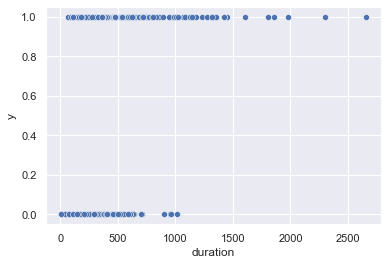

In [29]:
sns.scatterplot(x1,y)

    LLR p-value:	5.387e-35  is small. and P value is less than 0.05.  Rseudo R^2 between 0.2-0.4. Everything seems good.


## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [32]:
estimators = ['interest_rate', 'credit', 'march', 'previous', 'duration']

In [33]:
x2 = df[estimators]
y2 = df['y']

### Build a multivariate logistic regression model.

In [34]:
X = sm.add_constant(x2)
reg_log_m = sm.Logit(y2,X)
results_log_m = reg_log_m.fit()
results_log_m.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                  0.5143
Time:                        13:28:14   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
credit            2.3585      1.088      2.169      0.030       0.227       4.490
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [35]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [37]:
confusion_matrix(X,y2, results_log_m)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

In [39]:
# calculate without define function
cm = results_log_m.pred_table()
cm

array([[218.,  41.],
       [ 30., 229.]])

In [40]:
print('Accuracy', end=" ")

(cm[0,0]+cm[1,1])/cm.sum()

Accuracy 

0.862934362934363

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [55]:
df_raws = pd.read_csv('Bank_data_testing.csv')

In [56]:
df_raws.drop(df_raws.columns[0], axis=1, inplace=True)

In [57]:
df_raws['y'] = df_raws.y.map({'no':0, 'yes':1})

In [58]:
df_raws

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


### Declare the dependent and the independent variables

In [59]:
x_test = df_raws[['interest_rate', 'credit', 'march', 'previous', 'duration']]
y_test = df_raws['y']

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [60]:
x_test_const = sm.add_constant(x_test)

In [62]:
confusion_matrix(x_test_const,y_test,results_log_m)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

In [65]:
cm = results_log_m.pred_table()

In [66]:
(cm[0,0]+cm[1,1])/cm.sum()

0.862934362934363

    The model accuracy is 86.2934%, and when applied to the test data, the accuracy drops slightly to 86.0360%.   
    It's common for the test accuracy to be lower than the training accuracy in general.